In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Goal
The goal of this assignment is to give you a bit of practice manipulating data, using Bayes' rule, and constructing a naive Bayes classifier.  Naive Bayes is described in 10.1 of Barber and understanding examples 10.1 and 10.2 of the text should help you do this assignment.


## Data Set
The titanic data set gives the values of four categorical attributes for each of the 2201 people on board the Titanic when it struck an iceberg and sank. The attributes are social class (first class, second class, third class, crew member), age (adult or child), gender, and whether or not the person survived. The titanic data set is available here.

## Task 0
Build a joint probability table, like the ones we discussed in class notes, that represents the joint distribution over all variables, i.e., Pr(Gender, Age, Class, Outcome).  This table should have 32 entries because Gender $\in$ \{male, female}, Age $\in$ {Child, Adult}, Class $\in$ {1st, 2nd, 3rd}, and Outcome $\in$ {death, survival}. You will use the data in this table for the following tasks.  There is nothing to hand in for Task 0.

In [45]:
# Read in the data
df = pd.read_csv('titanic.txt', delimiter= '\s+')
df.columns = ['Class' , 'Age', 'Gender', 'Survived']
df = df.append({'Class':'1st', 'Age':'adult', 'Gender':'male', 'Survived':'yes'}, ignore_index=True)
df

Class    Age  Gender Survived
0      1st  adult    male      yes
1      1st  adult    male      yes
2      1st  adult    male      yes
3      1st  adult    male      yes
4      1st  adult    male      yes
5      1st  adult    male      yes
6      1st  adult    male      yes
7      1st  adult    male      yes
8      1st  adult    male      yes
9      1st  adult    male      yes
10     1st  adult    male      yes
11     1st  adult    male      yes
12     1st  adult    male      yes
13     1st  adult    male      yes
14     1st  adult    male      yes
15     1st  adult    male      yes
16     1st  adult    male      yes
17     1st  adult    male      yes
18     1st  adult    male      yes
19     1st  adult    male      yes
20     1st  adult    male      yes
21     1st  adult    male      yes
22     1st  adult    male      yes
23     1st  adult    male      yes
24     1st  adult    male      yes
25     1st  adult    male      yes
26     1st  adult    male      yes
27     1st  adult    male      yes
28     1st  adult    male      yes
29     1st  adult    male      yes
...    ...    ...     ...      ...
2171  crew  adult    male       no
2172  crew  adult    male       no
2173  crew  adult    male       no
2174  crew  adult    male       no
2175  crew  adult    male       no
2176  crew  adult    male       no
2177  crew  adult  female      yes
2178  crew  adult  female      yes
2179  crew  adult  female      yes
2180  crew  adult  female      yes
2181  crew  adult  female      yes
2182  crew  adult  female      yes
2183  crew  adult  female      yes
2184  crew  adult  female      yes
2185  crew  adult  female      yes
2186  crew  adult  female      yes
2187  crew  adult  female      yes
2188  crew  adult  female      yes
2189  crew  adult  female      yes
2190  crew  adult  female      yes
2191  crew  adult  female      yes
2192  crew  adult  female      yes
2193  crew  adult  female      yes
2194  crew  adult  female      yes
2195  crew  adult  female      yes
2196  crew  adult  female      yes
2197  crew  adult  female       no
2198  crew  adult  female       no
2199  crew  adult  female       no
2200   1st  adult    male      yes

[2201 rows x 4 columns]

In [46]:
bc = df.groupby(['Age', 'Gender', 'Class', 'Survived']).size().div(len(df))
bc

Age    Gender  Class  Survived
adult  female  1st    no          0.001817
                      yes         0.063607
               2nd    no          0.005906
                      yes         0.036347
               3rd    no          0.040436
                      yes         0.034530
               crew   no          0.001363
                      yes         0.009087
       male    1st    no          0.053612
                      yes         0.025897
               2nd    no          0.069968
                      yes         0.006361
               3rd    no          0.175829
                      yes         0.034075
               crew   no          0.304407
                      yes         0.087233
child  female  1st    yes         0.000454
               2nd    yes         0.005906
               3rd    no          0.007724
                      yes         0.006361
       male    1st    yes         0.002272
               2nd    yes         0.004998
               3rd    n

## Task 1
Build a probability table indicating Pr(death | Gender, Age, Class) for each combination of gender, age, and class. Display this table in the following way:

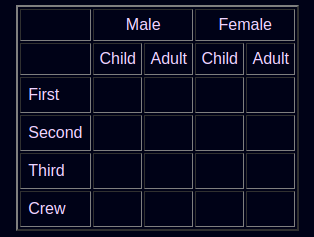

The rows of each table represent the different classes and the columns the different ages and genders. In each cell of the table, insert the conditional probability. Warning: Be alert to the possibility of a cell containing no data.

After you’ve built the probability table, come up with a rule that uses the probabilities to predict death or survival. Then make a second table, a classification table, which lists death or survival for each feature combination. Explain the rule you chose to classify.


In [47]:
death_df = df[df.Survived == "no"]
survival_df = df[df.Survived == "yes"]

In [48]:
count_table = pd.crosstab(index=df['Class'], 
                             columns=[df['Gender'],
                                      df['Age']],
                             margins=True)   # Include row and column totals
# prob_table = prob_table.div(prob_table.iloc[-1])
count_table

Gender female        male         All
Age     adult child adult child      
Class                                
1st       144     1   175     5   325
2nd        93    13   168    11   285
3rd       165    31   462    48   706
crew       23     0   862     0   885
All       425    45  1667    64  2201

In [49]:
death_table = pd.crosstab(index=death_df['Class'], 
                             columns=[death_df['Gender'],
                                      death_df['Age']],
                             margins=True)   # Include row and column totals
death_table = death_table.div(count_table)
death_table = death_table.drop("All", axis=0)
death_table = death_table.drop("All", axis=1)
death_table

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  import sys


Gender    female                male          
Age        adult     child     adult     child
Class                                         
1st     0.027778  0.000000  0.674286  0.000000
2nd     0.139785  0.000000  0.916667  0.000000
3rd     0.539394  0.548387  0.837662  0.729167
crew    0.130435       NaN  0.777262       NaN

In [50]:
survival_table = pd.crosstab(index=survival_df['Class'], 
                             columns=[survival_df['Gender'],
                                      survival_df['Age']],
                             margins=True)   # Include row and column totals
survival_table = survival_table.div(count_table)
survival_table = survival_table.drop("All", axis=0)
survival_table = survival_table.drop("All", axis=1)
survival_table

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  import sys


Gender    female                male          
Age        adult     child     adult     child
Class                                         
1st     0.972222  1.000000  0.325714  1.000000
2nd     0.860215  1.000000  0.083333  1.000000
3rd     0.460606  0.451613  0.162338  0.270833
crew    0.869565       NaN  0.222738       NaN

## Task 2
Build a Naive Bayes classifier. To build the classifier, you must first construct six one-dimensional tables: Pr(Class | death), Pr(Age | death), Pr(Gender | death), Pr(Class | survival), Pr(Age | survival), Pr(Gender | survival). To be clear on this notation, for Pr(Age | death), your table should have two rows, one for adult and one for child, and you should compute, for each age group, the probability of the deceased being in that age group. Also compute the unconditional probabilities, Pr(death) and Pr(survival), with Pr(death)+Pr(survival)=1. From this information, compute Pr(death | Gender, Age, Class) using the Naive Bayes assumption. In addition to the probability table, build the classification table as well.



In [51]:
class_death_table = prob_table = pd.crosstab(index=df['Class'], 
                             columns=[df['Survived']],
                             margins=True)   # Include row and column totals
class_death_table = class_death_table.div(class_death_table.iloc[-1])

In [52]:
age_death_table = prob_table = pd.crosstab(index=df['Age'], 
                             columns=[df['Survived']],
                             margins=True)   # Include row and column totals
age_death_table = age_death_table.div(age_death_table.iloc[-1])

In [53]:
gender_death_table = prob_table = pd.crosstab(index=df['Gender'], 
                             columns=[df['Survived']],
                             margins=True)   # Include row and column totals
gender_death_table = gender_death_table.div(gender_death_table.iloc[-1])

In [54]:
age_death_table = age_death_table.drop("All", axis = 0)
age_death_table = age_death_table.drop("All", axis = 1)
age_death_table

Survived        no       yes
Age                         
adult     0.965101  0.919831
child     0.034899  0.080169

In [55]:
gender_death_table = gender_death_table.drop("All", axis=0)
gender_death_table = gender_death_table.drop("All", axis=1)
gender_death_table

Survived        no       yes
Gender                      
female    0.084564  0.483826
male      0.915436  0.516174

In [56]:
class_death_table = class_death_table.drop("All", axis = 0)
class_death_table = class_death_table.drop("All", axis = 1)
class_death_table

Survived        no       yes
Class                       
1st       0.081879  0.285513
2nd       0.112081  0.165963
3rd       0.354362  0.250352
crew      0.451678  0.298172

In [57]:
class_death_table['no']['1st']

0.081879194630872482

In [58]:
survival_table = pd.crosstab(index=df['Survived'], columns="Percentage")
survival_table = survival_table.div(sum(survival_table.Percentage))
survival_table

col_0     Percentage
Survived            
no          0.676965
yes         0.323035

In [59]:
df['Survived']

0       yes
1       yes
2       yes
3       yes
4       yes
5       yes
6       yes
7       yes
8       yes
9       yes
10      yes
11      yes
12      yes
13      yes
14      yes
15      yes
16      yes
17      yes
18      yes
19      yes
20      yes
21      yes
22      yes
23      yes
24      yes
25      yes
26      yes
27      yes
28      yes
29      yes
       ... 
2171     no
2172     no
2173     no
2174     no
2175     no
2176     no
2177    yes
2178    yes
2179    yes
2180    yes
2181    yes
2182    yes
2183    yes
2184    yes
2185    yes
2186    yes
2187    yes
2188    yes
2189    yes
2190    yes
2191    yes
2192    yes
2193    yes
2194    yes
2195    yes
2196    yes
2197     no
2198     no
2199     no
2200    yes
Name: Survived, dtype: object

In [60]:
survival_table['Percentage']['yes']

0.32303498409813719

In [61]:
classes = ['1st', '2nd', '3rd', 'crew']
ages = ['adult', 'child']
genders = ['female', 'male']
survived = ['no', 'yes']
bayes_table = []


for passenger_survival in survived:
    for passenger_class in classes:
        for passenger_age in ages:
            for passenger_gender in genders:
                prob = \
                survival_table['Percentage'][passenger_survival] * \
                class_death_table[passenger_survival][passenger_class] * \
                age_death_table[passenger_survival][passenger_age] * \
                gender_death_table[passenger_survival][passenger_gender]
                   
                if passenger_survival == 'yes':
                    survival_complement = 'no'
                else:
                    survival_complement = 'yes'
                normalization_constant = prob + survival_table['Percentage'][survival_complement] * \
                class_death_table[survival_complement][passenger_class] * \
                age_death_table[survival_complement][passenger_age] * \
                gender_death_table[survival_complement][passenger_gender]
                     
                prob = prob / normalization_constant
                bayes_table.append([passenger_survival, passenger_class, passenger_age, passenger_gender, prob])
            

In [62]:
bayes_df = pd.DataFrame(bayes_table)
bayes_df.columns = ['Survived', 'Class', 'Age', 'Gender', 'Conditional Death Probability']
bayes_df

Survived Class    Age  Gender  Conditional Death Probability
0        no   1st  adult  female                       0.099270
1        no   1st  adult    male                       0.527924
2        no   1st  child  female                       0.043727
3        no   1st  child    male                       0.316935
4        no   2nd  adult  female                       0.206056
5        no   2nd  adult    male                       0.724782
6        no   2nd  child  female                       0.097214
7        no   2nd  child    male                       0.522135
8        no   3rd  adult  female                       0.352318
9        no   3rd  adult    male                       0.846617
10       no   3rd  child  female                       0.184136
11       no   3rd  child    male                       0.696059
12       no  crew  adult  female                       0.367951
13       no  crew  adult    male                       0.855222
14       no  crew  child  female                       0.194548
15       no  crew  child    male                       0.710219
16      yes   1st  adult  female                       0.900730
17      yes   1st  adult    male                       0.472076
18      yes   1st  child  female                       0.956273
19      yes   1st  child    male                       0.683065
20      yes   2nd  adult  female                       0.793944
21      yes   2nd  adult    male                       0.275218
22      yes   2nd  child  female                       0.902786
23      yes   2nd  child    male                       0.477865
24      yes   3rd  adult  female                       0.647682
25      yes   3rd  adult    male                       0.153383
26      yes   3rd  child  female                       0.815864
27      yes   3rd  child    male                       0.303941
28      yes  crew  adult  female                       0.632049
29      yes  crew  adult    male                       0.144778
30      yes  crew  child  female                       0.805452
31      yes  crew  child    male                       0.289781

In [63]:
total_conditional = pd.pivot_table(bayes_df, index=['Class'], 
                          columns=['Gender', 'Age'])   # Include row and column totals
# bayes_table = bayes_table.div(prob_table.iloc[-1])
total_conditional

Conditional Death Probability                  
Gender                        female        male      
Age                            adult child adult child
Class                                                 
1st                              0.5   0.5   0.5   0.5
2nd                              0.5   0.5   0.5   0.5
3rd                              0.5   0.5   0.5   0.5
crew                             0.5   0.5   0.5   0.5

In [64]:
# Conditional Death
bayes_split = np.array_split(bayes_df, 2)

bayes_death_table = pd.pivot_table(bayes_split[0], index=['Class'], 
                          columns=['Gender', 'Age'])   # Include row and column totals
# bayes_death_table = bayes_death_table.div(total_conditional)
bayes_death_table

Conditional Death Probability                              
Gender                        female                male          
Age                            adult     child     adult     child
Class                                                             
1st                         0.099270  0.043727  0.527924  0.316935
2nd                         0.206056  0.097214  0.724782  0.522135
3rd                         0.352318  0.184136  0.846617  0.696059
crew                        0.367951  0.194548  0.855222  0.710219

In [65]:
# Conditional Survival
bayes_survival_table = pd.pivot_table(bayes_split[1], index=['Class'], 
                          columns=['Gender', 'Age'])   # Include row and column totals

# bayes_survival_table = bayes_survival_table.div(total_conditional)

bayes_survival_table.rename(columns={"Conditional Death Probability":"Conditional Survival Probability"})

Conditional Survival Probability                              
Gender                           female                male          
Age                               adult     child     adult     child
Class                                                                
1st                            0.900730  0.956273  0.472076  0.683065
2nd                            0.793944  0.902786  0.275218  0.477865
3rd                            0.647682  0.815864  0.153383  0.303941
crew                           0.632049  0.805452  0.144778  0.289781

## Task 3
The classification tables you built in Tasks 1 and 2 are not identical. Discuss the advantages/disadvantages of each table for making predictions in case of another disaster like the Titanic (assuming it occurred at the same time in history). Under what circumstances would you expect an empirical  table to provide better predictions? Under what circumstances would you expect the naive Bayes  table to provide better predictions?